In [166]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [167]:
from analysis_lib import *

# kBioReg vs Prosite Scanner

In [9]:
benchmark_df = pd.read_csv("/Users/rschwab/repos/kBioReg/data/RESULTS/pdb_alphamods_results.csv")

In [6]:
benchmark_df["TOTAL"] = pd.Series(benchmark_df.LOAD+benchmark_df.SEARCH)

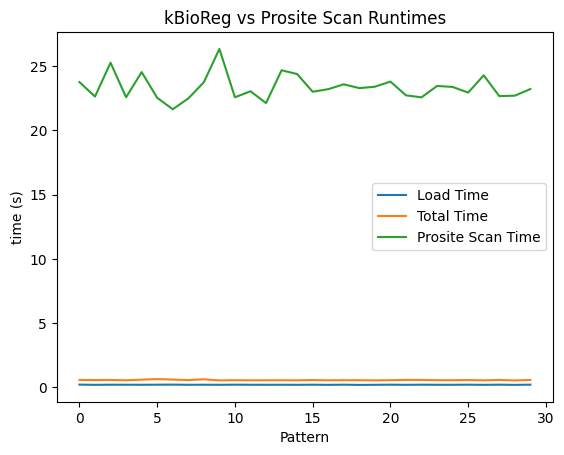

In [10]:
plt.title("kBioReg vs Prosite Scan Runtimes")

plt.plot(range(30), benchmark_df.LOAD, label="Load Time")
plt.plot(range(30), benchmark_df.TOTAL, label="Total Time")
plt.plot(range(30), benchmark_df.PS_SCAN, label="Prosite Scan Time")

plt.xlabel('Pattern')
plt.ylabel('time (s)')
plt.legend()
plt.savefig("pdb_scan.png")
plt.show()

# Swiss Prot Record Size Distributions

In [88]:
uniprot = pysam.FastaFile("/Users/rschwab/repos/kBioReg/data/REFERENCES/uniprot_sprot.fasta")

In [89]:
record_length_series = pd.Series(uniprot.lengths)
record_length_series.describe()

count    568744.000000
mean        361.406919
std         340.146814
min           2.000000
25%         169.000000
50%         295.000000
75%         449.000000
max       35213.000000
dtype: float64

<Axes: ylabel='Frequency'>

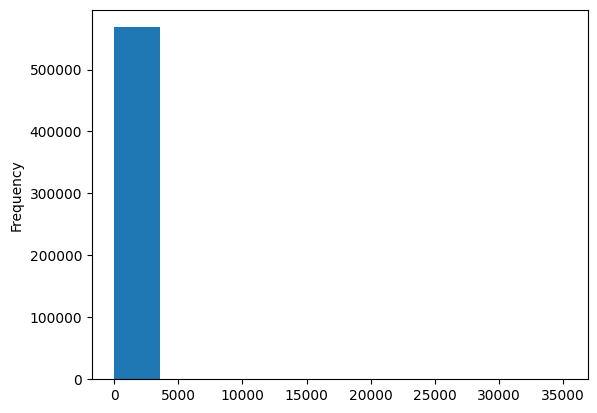

In [90]:
record_length_series.plot.hist()

# 

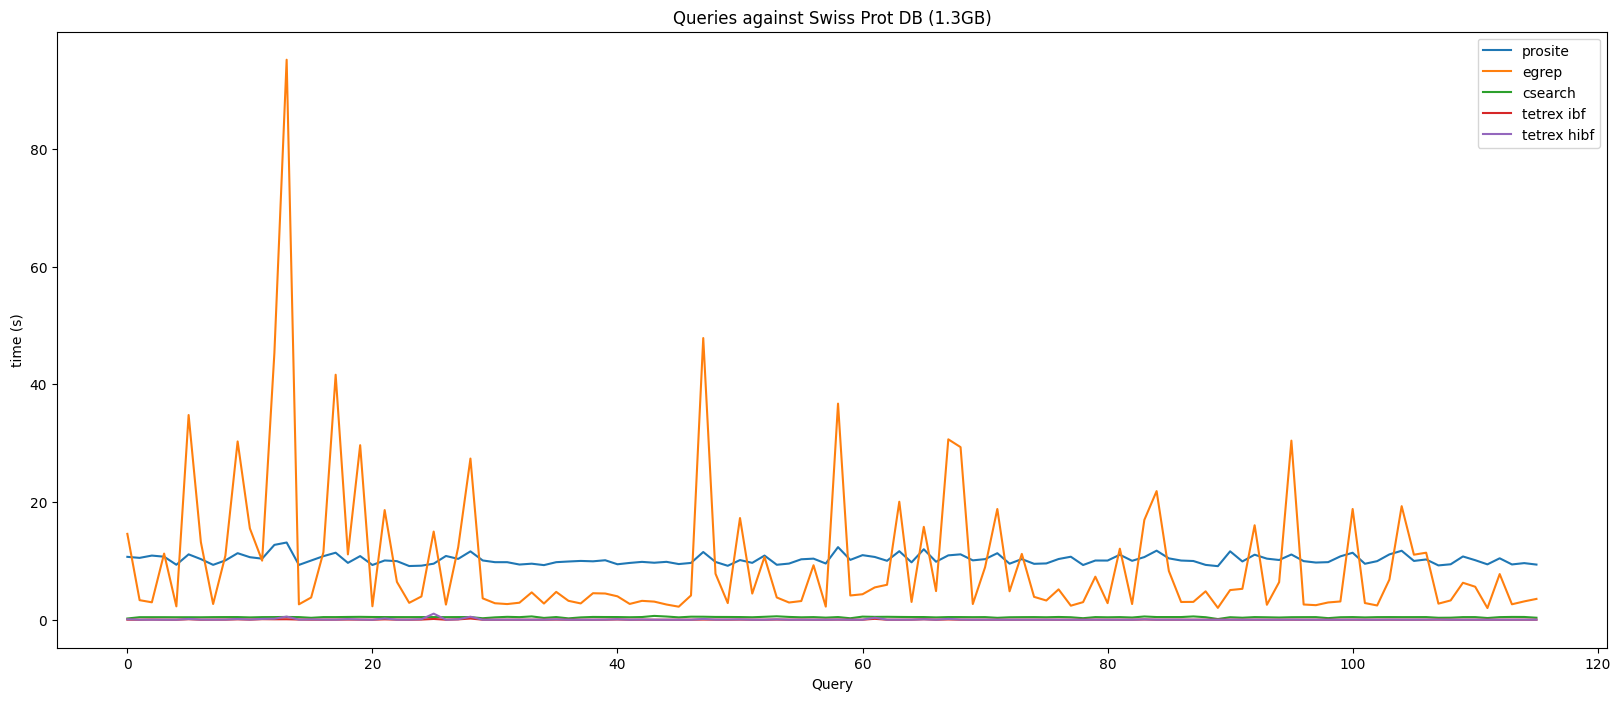

In [45]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(116), sprot_df.PROSITE_TIME, label="prosite")
plt.plot(range(116), sprot_df.EGREP, label="egrep")
plt.plot(range(116), sprot_df.CSEARCH_TIME, label="csearch")
plt.plot(range(116), sprot_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(116), sprot_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

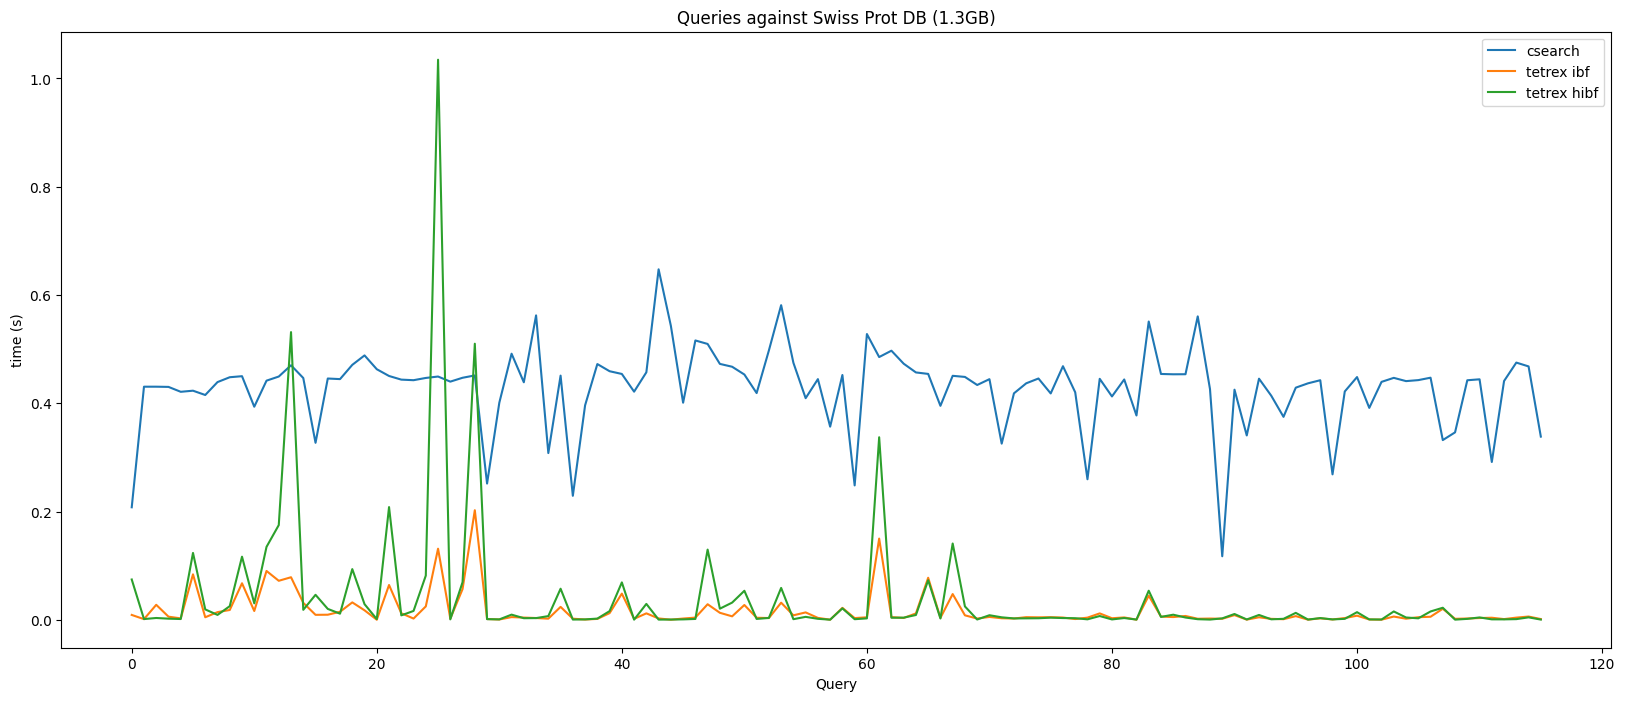

In [46]:
figure(figsize=(20,8))
plt.title("Queries against Swiss Prot DB (1.3GB)")

plt.plot(range(116), sprot_df.CSEARCH_TIME, label="csearch")
plt.plot(range(116), sprot_df.TETREX_IBF, label="tetrex ibf")
plt.plot(range(116), sprot_df.TETREX_HIBF, label="tetrex hibf")

plt.xlabel('Query')
plt.ylabel('time (s)')
plt.legend()

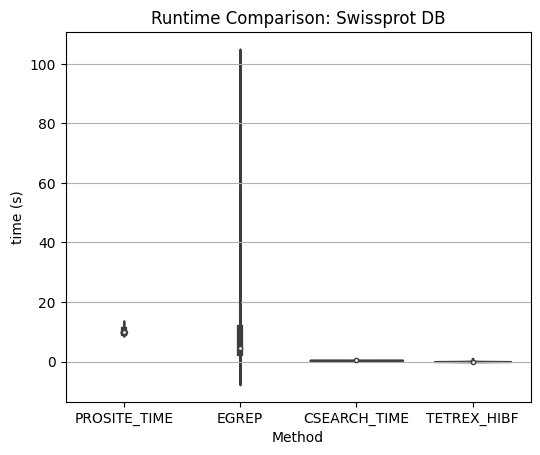

In [69]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['PROSITE_TIME','EGREP','CSEARCH_TIME','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')
fig.set_figwidth(6)

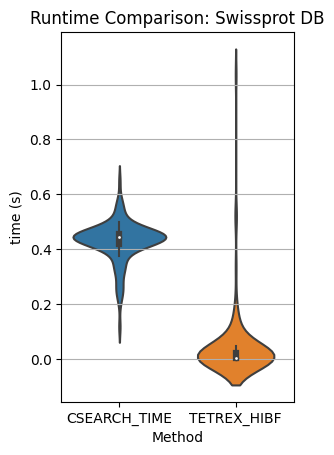

In [70]:
fig, axes = plt.subplots()
sns.violinplot(data=sprot_df[['CSEARCH_TIME','TETREX_HIBF']], ax = axes)
axes.set_title('Runtime Comparison: Swissprot DB')

axes.yaxis.grid(True)
axes.set_xlabel('Method')
axes.set_ylabel('time (s)')
fig.set_figwidth(3)

# FP Analysis

## IBF

In [147]:
tetrex_ibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis/"
tetrex_ibf_results, ibf_true_positives = compare_to_prosite(tetrex_output=tetrex_ibf_output)

In [148]:
ibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_ibf_results, ibf_true_positives)]

In [149]:
sum(ibf_false_positives)

188

<Axes: ylabel='Frequency'>

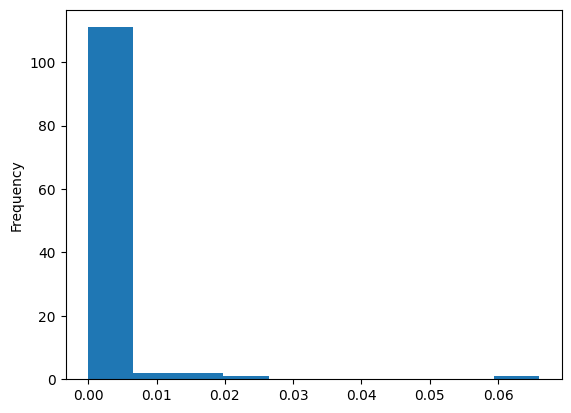

In [150]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(ibf_false_positives, tetrex_ibf_results)]).plot.hist()

<Axes: ylabel='Frequency'>

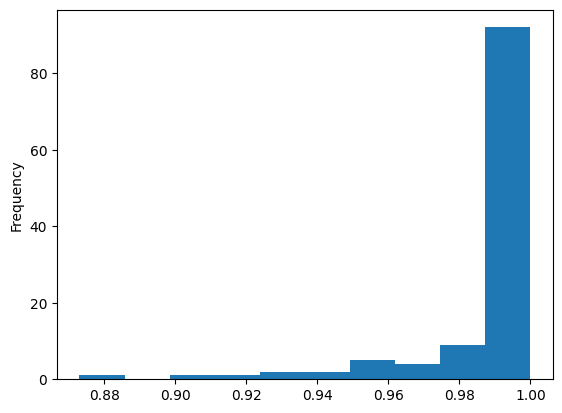

In [163]:
pd.Series([(1024-pred)/1024 for pred in tetrex_ibf_results]).plot.hist()

## HIBF

In [151]:
tetrex_hibf_output = "/Users/rschwab/repos/TetRex/data/RESULTS/fp_analysis_hibf/"
tetrex_hibf_results, hibf_true_positives = compare_to_prosite(tetrex_output=tetrex_hibf_output)

In [161]:
hibf_false_positives = [(pred-tp) for pred, tp in zip(tetrex_hibf_results, hibf_true_positives)]
sum(hibf_false_positives)

2431

In [160]:
# os.listdir(tetrex_hibf_output)[max(range(len(hibf_false_positives)), key=hibf_false_positives.__getitem__)]
max(hibf_false_positives)


748

<Axes: ylabel='Frequency'>

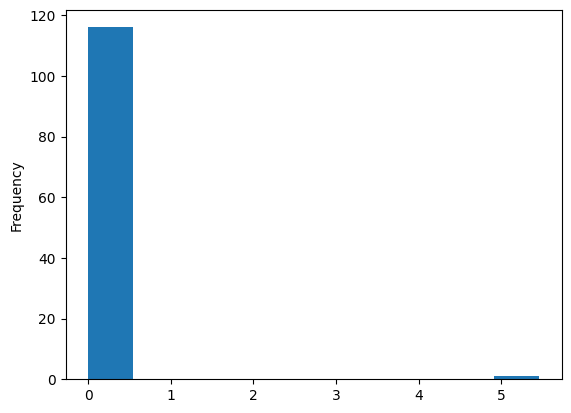

In [132]:
pd.Series([fp/((1024-tp)) for fp,tp in zip(false_positives, tetrex_results)]).plot.hist()

In [166]:
pd.Series([(1024-pred)/1024 for pred in tetrex_hibf_results]).describe()

count    117.000000
mean       0.968399
std        0.090454
min        0.133789
25%        0.977539
50%        0.996094
75%        0.998047
max        1.000000
dtype: float64

In [111]:
pd.Series([egrep/tetrex for egrep, tetrex in zip(info_df['QueryTime (s)'][info_df['Tool'] == "egrep"],info_df['QueryTime (s)'][info_df['Tool'] == "tetrex"])]).describe()

count        5.000000
mean      6811.699408
std      13319.209649
min         89.128027
25%        277.487574
50%       1500.006240
75%       1585.454310
max      30606.420889
dtype: float64

In [112]:
pd.Series([egrep/tetrex for egrep, tetrex in zip(info_df['QueryTime (s)'][info_df['Tool'] == "csearch"],info_df['QueryTime (s)'][info_df['Tool'] == "tetrex"])]).describe()

count        5.000000
mean     10653.741447
std      21931.049224
min         67.931214
25%        220.307129
50%       1451.584164
75%       1664.426936
max      49864.457791
dtype: float64

In [92]:
pd.Series(sprot_df['PROSITE_TIME']/sprot_df['TETREX_HIBF']).describe()

count      116.000000
mean      3817.878941
std       4196.558683
min          9.205490
25%        463.724243
50%       2343.485350
75%       5971.335751
max      16220.713073
dtype: float64

In [93]:
pd.Series(sprot_df['EGREP']/sprot_df['TETREX_HIBF']).describe()

count     116.000000
mean     1683.465308
std      1554.529277
min        14.484825
25%       325.869514
50%      1284.556941
75%      2719.191561
max      6735.243056
dtype: float64

In [94]:
pd.Series(sprot_df['CSEARCH_TIME']/sprot_df['TETREX_HIBF']).describe()

count    116.000000
mean     158.010850
std      180.972492
min        0.434535
25%       20.277944
50%       96.607218
75%      237.673362
max      903.115760
dtype: float64

### Absolute Runtime with no Egrep

In [15]:
# sns.barplot(sim_df[(sim_df["Cache"] == "cold") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Cold Cache)")

In [16]:
# sns.barplot(sim_df[(sim_df["Cache"] == "cold") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query time Comparison (Cold Cache)")

In [17]:
# sns.barplot(sim_df[(sim_df["Cache"] == "hot") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="total time (s)", hue="Tool").set_title("Total Runtime Comparison (Hot Cache)")

In [18]:
# sns.barplot(sim_df[(sim_df["Cache"] == "hot") & (sim_df["Tool"] != "egrep")], x="RegEx ID", y="query time (s)", hue="Tool").set_title("Query time Comparison (Hot Cache)")

## Normalized Runtime Analysis

In [19]:
# ## Normalize times
# # Get the reference times for tetrex
# tetrex_times = sim_df[sim_df['Tool'] == 'tetrex'].set_index(['RegEx ID', 'Cache'])

# # Merge the reference times with the original dataframe
# sim_df = sim_df.set_index(['RegEx ID', 'Cache'])
# sim_df['tetrex_total_time'] = tetrex_times['total time (s)']
# sim_df['tetrex_query_time'] = tetrex_times['query time (s)']

# # Normalize the times
# sim_df['Normalized Total Time'] = sim_df['total time (s)'] / sim_df['tetrex_total_time']
# sim_df['Normalized Query Time'] = sim_df['query time (s)'] / sim_df['tetrex_query_time']

# # Reset index
# sim_df = sim_df.reset_index()

# # Drop the auxiliary columns if you don't need them anymore
# sim_df.drop(columns=['tetrex_total_time', 'tetrex_query_time'], inplace=True)

In [20]:
# sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Total Time Comparison (Cold Cache)")

In [21]:
# sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Query Time Comparison (Cold Cache)")

In [22]:
# sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Total Time Comparison (Hot Cache)")

In [23]:
# sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Query Time Comparison (Hot Cache)")

In [24]:
# sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "cold")], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Normalized Total Time Comparison (Cold Cache)")

In [25]:
# sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "cold")], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Normalized Query Time Comparison (Cold Cache)")

In [26]:
# sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "hot")], x="RegEx ID", y="Normalized Total Time", hue="Tool").set_title("Normalized Query Time Comparison (Hot Cache)")

In [27]:
# sns.barplot(sim_df[(sim_df["Tool"] != "egrep") & (sim_df["Cache"] == "hot")], x="RegEx ID", y="Normalized Query Time", hue="Tool").set_title("Normalized Query Time Comparison (Hot Cache)")

## Gb/s Normalization

In [41]:
sim_df["GB/s"] = 1/sim_df["query time (s)"]

In [42]:
sim_df["GB/s (with Index Load Time)"] = 1/sim_df["total time (s)"]

In [43]:
sim_df[sim_df["Cache"] == "hot"]

,RegEx ID,Tool,Cache,total time (s),query time (s),GB/s,GB/s (with Index Load Time)
5,1,ripgrep,hot,7.275000,7.275000,0.137457,0.137457
6,2,ripgrep,hot,8.595000,8.595000,0.116347,0.116347
7,3,ripgrep,hot,21.271000,21.271000,0.047012,0.047012
8,4,ripgrep,hot,7.019000,7.019000,0.142470,0.142470
9,5,ripgrep,hot,9.465000,9.465000,0.105652,0.105652
15,1,csearch,hot,6.697000,6.697000,0.149321,0.149321
16,2,csearch,hot,6.641756,6.641756,0.150563,0.150563
17,3,csearch,hot,6.635184,6.635184,0.150712,0.150712
18,4,csearch,hot,6.640707,6.640707,0.150586,0.150586
19,5,csearch,hot,6.637957,6.637957,0.150649,0.150649


In [44]:
sim_df[sim_df["Cache"] == "cold"]

,RegEx ID,Tool,Cache,total time (s),query time (s),GB/s,GB/s (with Index Load Time)
0,1,ripgrep,cold,9.562000,9.562000,0.104581,0.104581
1,2,ripgrep,cold,10.341000,10.341000,0.096702,0.096702
2,3,ripgrep,cold,21.840000,21.840000,0.045788,0.045788
3,4,ripgrep,cold,9.542000,9.542000,0.104800,0.104800
4,5,ripgrep,cold,11.385000,11.385000,0.087835,0.087835
10,1,csearch,cold,10.100000,10.100000,0.099010,0.099010
11,2,csearch,cold,10.027881,10.027881,0.099722,0.099722
12,3,csearch,cold,10.301633,10.301633,0.097072,0.097072
13,4,csearch,cold,10.095272,10.095272,0.099056,0.099056
14,5,csearch,cold,10.091027,10.091027,0.099098,0.099098


In [6]:
cold_df = sim_df[sim_df["Cache"] == "cold"]
hot_df = sim_df[sim_df["Cache"] == "hot"]

In [10]:
hot_df[hot_df["Tool"] == "egrep"]["query time (s)"].mean()/hot_df[hot_df["Tool"] == "tetrex"]["query time (s)"].mean()

374.1957692408535

In [11]:
hot_df[hot_df["Tool"] == "csearch"]["query time (s)"].mean()/hot_df[hot_df["Tool"] == "tetrex"]["query time (s)"].mean()

28.124376977538628

In [12]:
hot_df[hot_df["Tool"] == "ripgrep"]["query time (s)"].mean()/hot_df[hot_df["Tool"] == "tetrex"]["query time (s)"].mean()

45.354935674225956

In [385]:
# fig, axes = plt.subplots()
# sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool", ax=axes)
# # for container in axes.containers:
# #     axes.bar_label(container)
# axes.set_title('Bins Verified Comparison: Swissprot DB')
# axes.set_xlabel('Method')
# axes.set_ylabel('GB/s (with Load Time)')

Text(0.5, 1.0, 'Total Runtime Comparison (Cold Cache)')

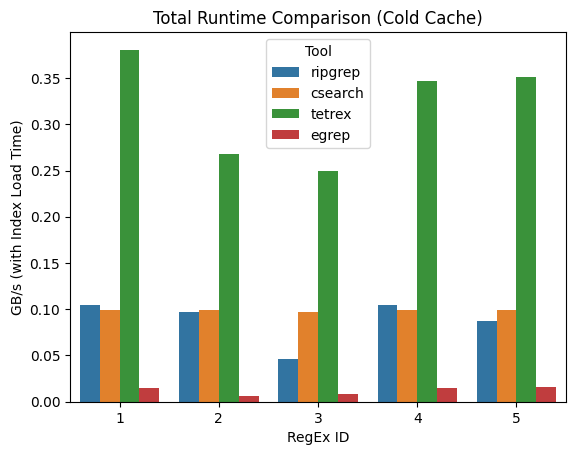

In [45]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool").set_title("Total Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Query Runtime Comparison (Cold Cache)')

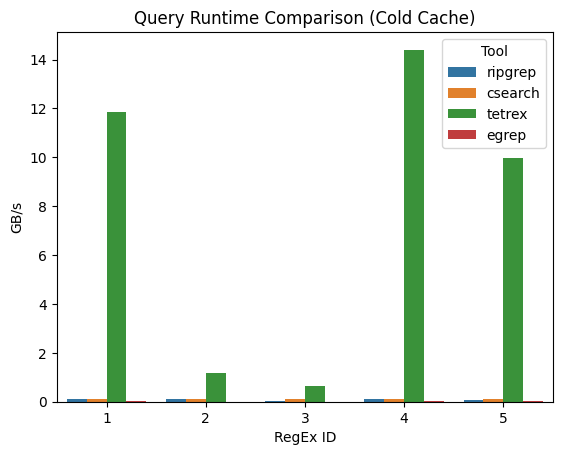

In [46]:
sns.barplot(sim_df[sim_df["Cache"] == "cold"], x="RegEx ID", y="GB/s", hue="Tool").set_title("Query Runtime Comparison (Cold Cache)")

Text(0.5, 1.0, 'Total Runtime Comparison (Hot Cache)')

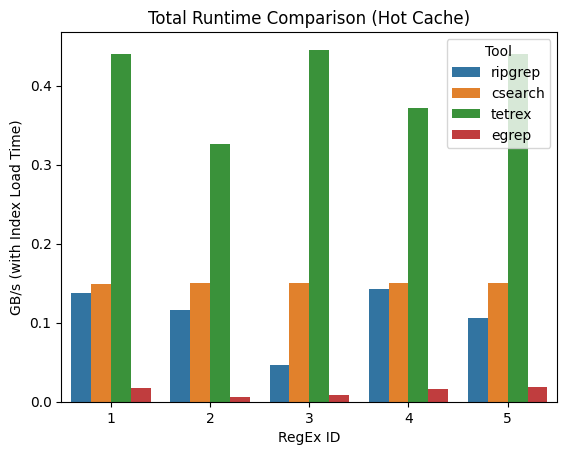

In [47]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="GB/s (with Index Load Time)", hue="Tool").set_title("Total Runtime Comparison (Hot Cache)")

Text(0.5, 1.0, 'Query Runtime Comparison (Hot Cache)')

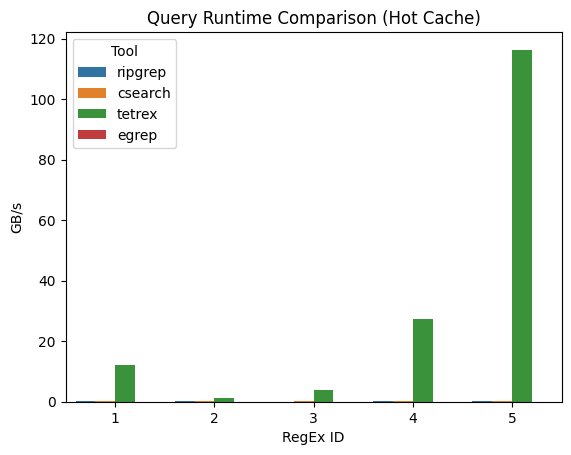

In [48]:
sns.barplot(sim_df[sim_df["Cache"] == "hot"], x="RegEx ID", y="GB/s", hue="Tool").set_title("Query Runtime Comparison (Hot Cache)")

## Swissprot with RipGrep

In [1]:
sprot_df = pd.read_csv("/Users/rschwab/repos/tetrex_analysis/data/RESULTS/all_sprot_times.tsv", sep="\t")

NameError: name 'pd' is not defined

In [7]:
sprot_melt

,RegEx ID,Tool,Runtime (s)
0,PS00032,PROSITE,10.686000
1,PS00033,PROSITE,10.512000
2,PS00058,PROSITE,10.902000
3,PS00064,PROSITE,10.712000
4,PS00069,PROSITE,9.343000
...,...,...,...
575,PS01345,TETREX,0.001186
576,PS01349,TETREX,0.001152
577,PS60002,TETREX,0.001588
578,PS60009,TETREX,0.004876


# Gb/s Analysis

In [8]:
sprot_melt["GB/s"] = 1/sprot_melt["Runtime (s)"]

In [9]:
sprot_melt

,RegEx ID,Tool,Runtime (s),GB/s
0,PS00032,PROSITE,10.686000,0.093580
1,PS00033,PROSITE,10.512000,0.095129
2,PS00058,PROSITE,10.902000,0.091726
3,PS00064,PROSITE,10.712000,0.093353
4,PS00069,PROSITE,9.343000,0.107032
...,...,...,...,...
575,PS01345,TETREX,0.001186,843.170320
576,PS01349,TETREX,0.001152,868.055556
577,PS60002,TETREX,0.001588,629.722922
578,PS60009,TETREX,0.004876,205.086136


In [13]:
# sprot_melt.groupby("Tool")['Runtime (s)'].mean()

In [14]:
sprot_melt.groupby("Tool")['GB/s'].mean()

Tool
CSEARCH      2.441516
EGREP        0.219544
PROSITE      0.098261
RIPGREP      5.289371
TETREX     384.820709
Name: GB/s, dtype: float64

Text(0.5, 1.0, 'Swissprot DB Runtime Comparison')

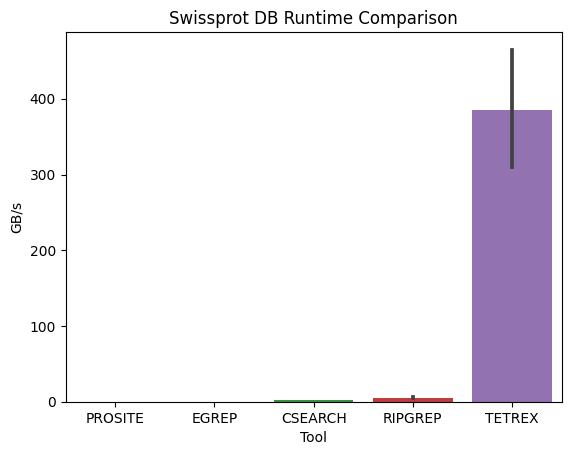

In [12]:
ax = sns.barplot(sprot_melt, x="Tool", y="GB/s")
ax.set_title("Swissprot DB Runtime Comparison")
# ax.bar_label(ax.containers[0])

In [386]:
sprot_df['CSEARCH_FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['CSEARCH_BINS']])
sprot_df['TETREX_FRACTION'] = pd.Series([((pred)/1024)*100 for pred in sprot_df['TETREX_BINS']])